# Neural Networks for Function Approximation

This notebook demonstrates how neural networks can learn to approximate complex polynomial functions, similar to how Taylor series expansions work in calculus.

## Key Concepts:
- Neural networks can act as universal function approximators
- Like Taylor series that approximate functions using polynomial terms, neural networks learn the underlying patterns and coefficients
- The network uses non-linear activation functions (ReLU) to capture complex relationships
- Through training, it discovers the optimal coefficients/weights to minimize error

## Implementation:
- We generate synthetic data from a 3rd degree polynomial with noise
- A simple feedforward neural network learns to fit this data
- The network has 2 hidden layers with ReLU activation
- We use MSE loss and Adam optimizer for training

This demonstrates how neural networks can learn complex mathematical relationships without explicitly being programmed with the polynomial coefficients, similar to how Taylor series can approximate arbitrary smooth functions.


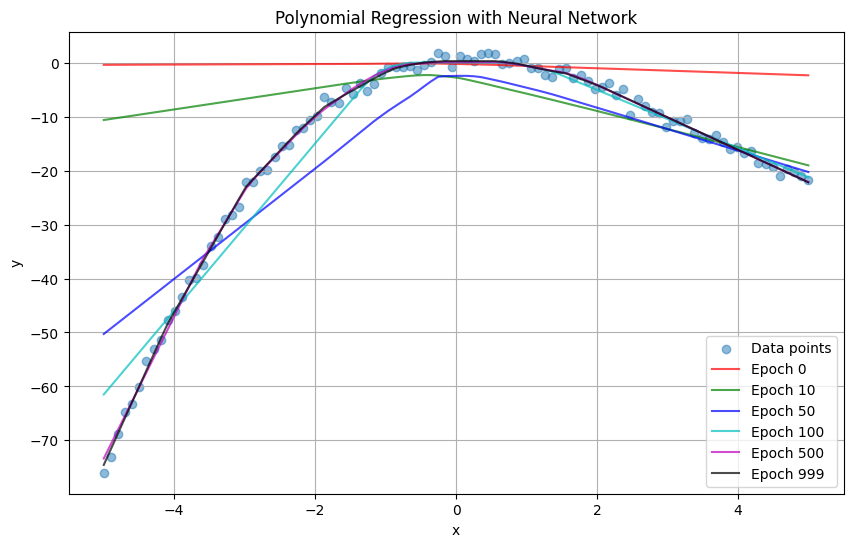

Final loss: 0.7750


In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

# Generate synthetic data
def generate_polynomial_data(n_samples=100):
    X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
    # Example polynomial: y = 0.2x^3 - 2x^2 + 0.5x + 1 + noise
    # We are focusing on learning the coefficients of the polynomial a + bx + cx^2 + dx^3 + ...
    y = 0.2 * X**3 - 2 * X**2 + 0.5 * X + 1 + np.random.normal(0, 1, size=X.shape)
    return X, y

# Create a simple neural network
class PolynomialNetwork(nn.Module):
    def __init__(self, input_size=1, hidden_size=32):
        super().__init__()
        self.network = nn.ModuleList([
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
        ])
    
    def forward(self, x):
        for layer in self.network:
            # Forward pass layer by layer
            x = layer(x)
        return x

# Generate data
X, y = generate_polynomial_data()

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# Create the model, loss function, and optimizer
model = PolynomialNetwork()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Visualization setup
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Data points', alpha=0.5)
plt.title('Polynomial Regression with Neural Network')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Training loop with visualization
n_epochs = 1000
plot_intervals = [0, 10, 50, 100, 500, n_epochs-1]
colors = ['r', 'g', 'b', 'c', 'm', 'k']

for epoch in range(n_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Visualize at specific intervals
    if epoch in plot_intervals:
        with torch.no_grad():
            pred = model(X_tensor).numpy()
            plt.plot(X, pred, 
                    label=f'Epoch {epoch}',
                    color=colors[plot_intervals.index(epoch)],
                    alpha=0.7)

plt.legend()
plt.show()

# Print final loss
print(f"Final loss: {loss.item():.4f}")

/tmp/ipykernel_1489/1487934845.py:17: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  term = ((-1)**n * (x - x0)**(2*n + 1)) / np.math.factorial(2*n + 1)


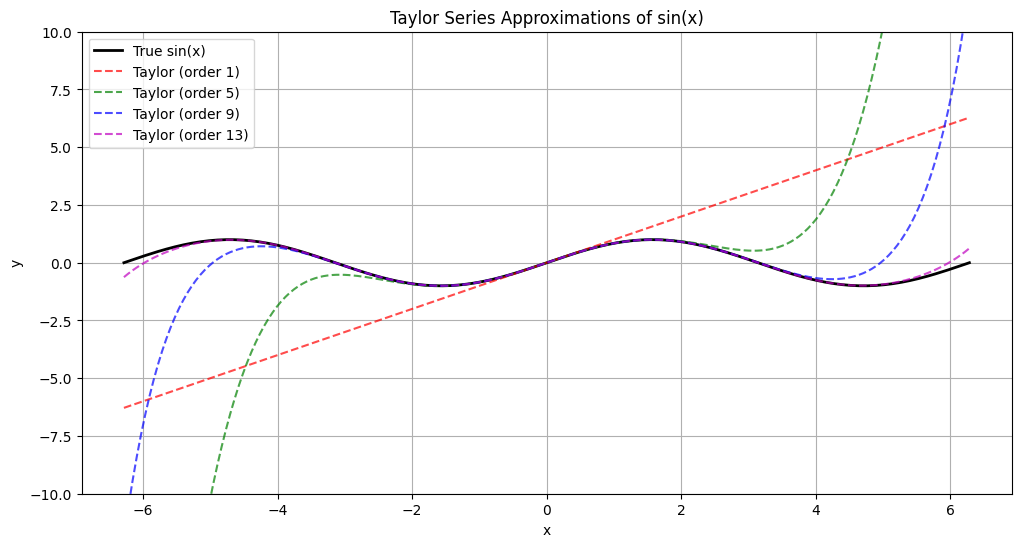

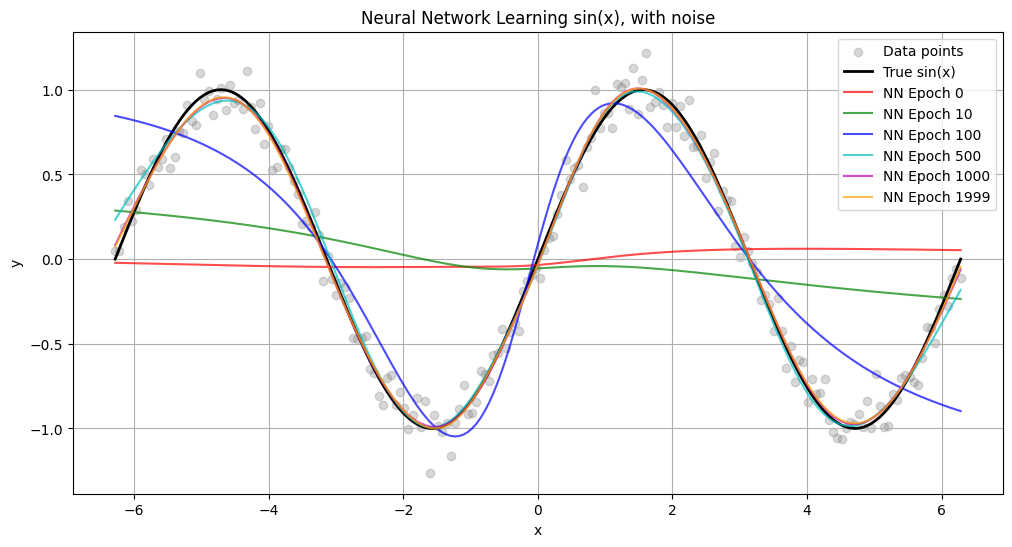

Final loss: 0.0080


In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import math

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)

def taylor_series_terms(x, x0=0, order=4):
    """Calculate Taylor series terms for sin(x) around x0"""
    terms = []
    # sin(x) Taylor series terms: x - x³/3! + x⁵/5! - x⁷/7! ...
    for n in range(order):
        term = ((-1)**n * (x - x0)**(2*n + 1)) / math.factorial(2*n + 1)
        terms.append(term)
    return terms

def plot_taylor_approximations(x, orders=[1, 3, 5, 7]):
    """Plot Taylor series approximations of different orders"""
    plt.figure(figsize=(12, 6))
    
    # Plot true sin(x)
    plt.plot(x, np.sin(x), 'k-', label='True sin(x)', linewidth=2)
    
    # Plot Taylor approximations
    colors = ['r', 'g', 'b', 'm']
    for order, color in zip(orders, colors):
        terms = taylor_series_terms(x, order=order)
        approximation = np.sum(terms, axis=0)
        plt.plot(x, approximation, f'{color}--', 
                label=f'Taylor (order {2*order-1})', 
                alpha=0.7)
    
    plt.title('Taylor Series Approximations of sin(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(-10, 10)  # Set y-axis limits
    plt.grid(True)
    plt.legend()
    plt.show()

# Generate data for sin(x)
X = np.linspace(-2*np.pi, 2*np.pi, 200).reshape(-1, 1)
y = np.sin(X) + np.random.normal(0, 0.1, size=X.shape)  # Add some noise

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# Create a neural network with increasing complexity in hidden layers
class TaylorNetwork(nn.Module):
    def __init__(self, input_size=1, hidden_sizes=[32, 64, 32]):
        super().__init__()
        self.layers = nn.ModuleList()
        prev_size = input_size
        
        # Build network using ModuleList
        for hidden_size in hidden_sizes:
            self.layers.append(nn.Linear(prev_size, hidden_size))
            self.layers.append(nn.Tanh())
            prev_size = hidden_size
        
        # Output layer
        self.layers.append(nn.Linear(prev_size, 1))
    
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Create model, loss function, and optimizer
model = TaylorNetwork()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# First plot: Taylor series approximations
plot_taylor_approximations(X.flatten())

# Second plot: Neural Network learning
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Data points', alpha=0.3, color='gray')
plt.plot(X, np.sin(X), 'k-', label='True sin(x)', linewidth=2)

# Training loop with visualization
n_epochs = 2000
plot_intervals = [0, 10, 100, 500, 1000, n_epochs-1]
colors = ['r', 'g', 'b', 'c', 'm', 'orange']

for epoch in range(n_epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Visualize at specific intervals
    if epoch in plot_intervals:
        with torch.no_grad():
            pred = model(X_tensor).numpy()
            plt.plot(X, pred, 
                    label=f'NN Epoch {epoch}',
                    color=colors[plot_intervals.index(epoch)],
                    alpha=0.7)

plt.title('Neural Network Learning sin(x), with noise')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# Print final loss
print(f"Final loss: {loss.item():.4f}")